In [73]:
#Importing liabraries
import numpy as np
import pandas as pd
import sklearn as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

# Data collection and processing

In [2]:
#Data collection and processing
#loading csv data to pandas dataframe
heart_data = pd.read_csv(r"C:\Users\dell\Downloads\Heart Disease data\Heart Disease data\Heart Disease data.csv")


In [3]:
#print first 5 rows
heart_data.head()   #for end 5 we use tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# number of rows and columns in dataset
heart_data.shape

(1025, 14)

In [5]:
# getting some info about the data 
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Data Dictionary

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [6]:
#stastical measures about the data 
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Statistical summary of the numerical features

Age :The average age in the dataset is 54.5 years
    
The oldest is 77 years, whereas the youngest is 29 years old

Cholesterol:The average registered cholestrol level is 247.15

Maximum level is 564 and the minimum level is 126.

Note: According to [6], a healthy cholesterol level is  <200mg/dl and usually high level of cholesterol is associated with heart disease.

Resting blood pressure:131 mean, 200 max and 94 min

Max heart rate achieved:The abverage max heart rate registered is 149.5 bpm. The Maximum and the minumum are 202 and 71bpm respectively.

St_depression:The average value of st_dpression is 1.06. Max is 6.2 and the minimum is 0.

Number of major blood vessels:

A maximum of 3 and a minimum of 0 major blood vessels are observed. The mean value is 0.68.

In [14]:
# checking the distribution of target variable
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

1-- represent defective heart
0-- represent healthy heart 

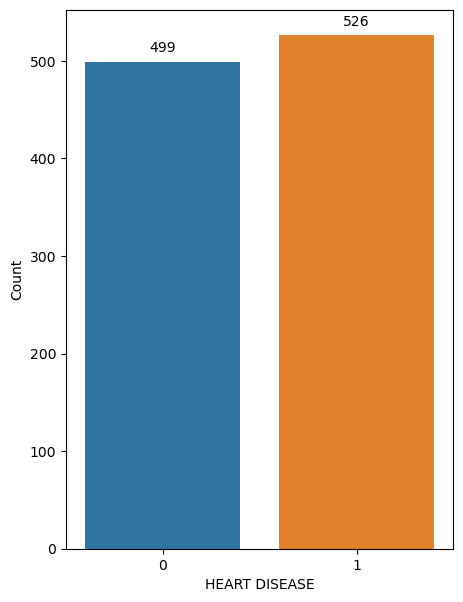

In [44]:
plt.figure(figsize=(5, 7))
sns.countplot(data=heart_data, x='target')
plt.xlabel('HEART DISEASE')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

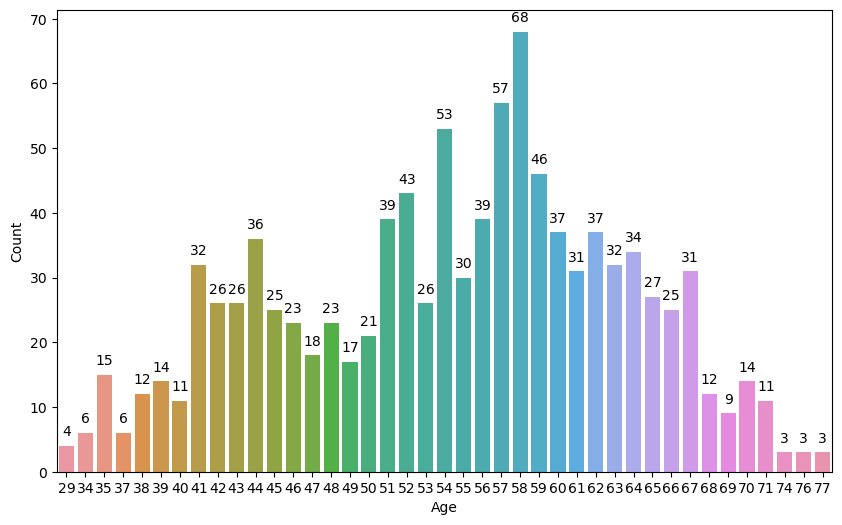

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(data=heart_data, x='age')
plt.xlabel('Age')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

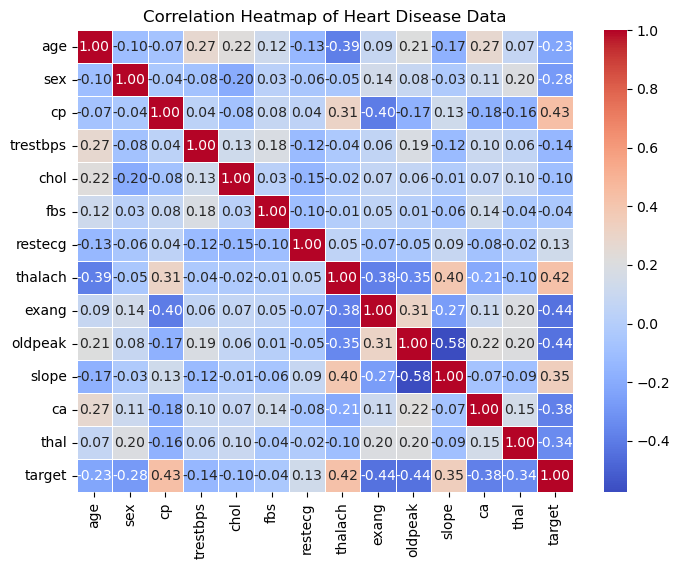

In [46]:
# Compute the correlation matrix
corr_matrix = heart_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Heart Disease Data')

# Show the plot
plt.show()


# Splitting the features and target


In [54]:
X = heart_data.drop(columns='target', axis =1)
Y = heart_data['target']

In [17]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

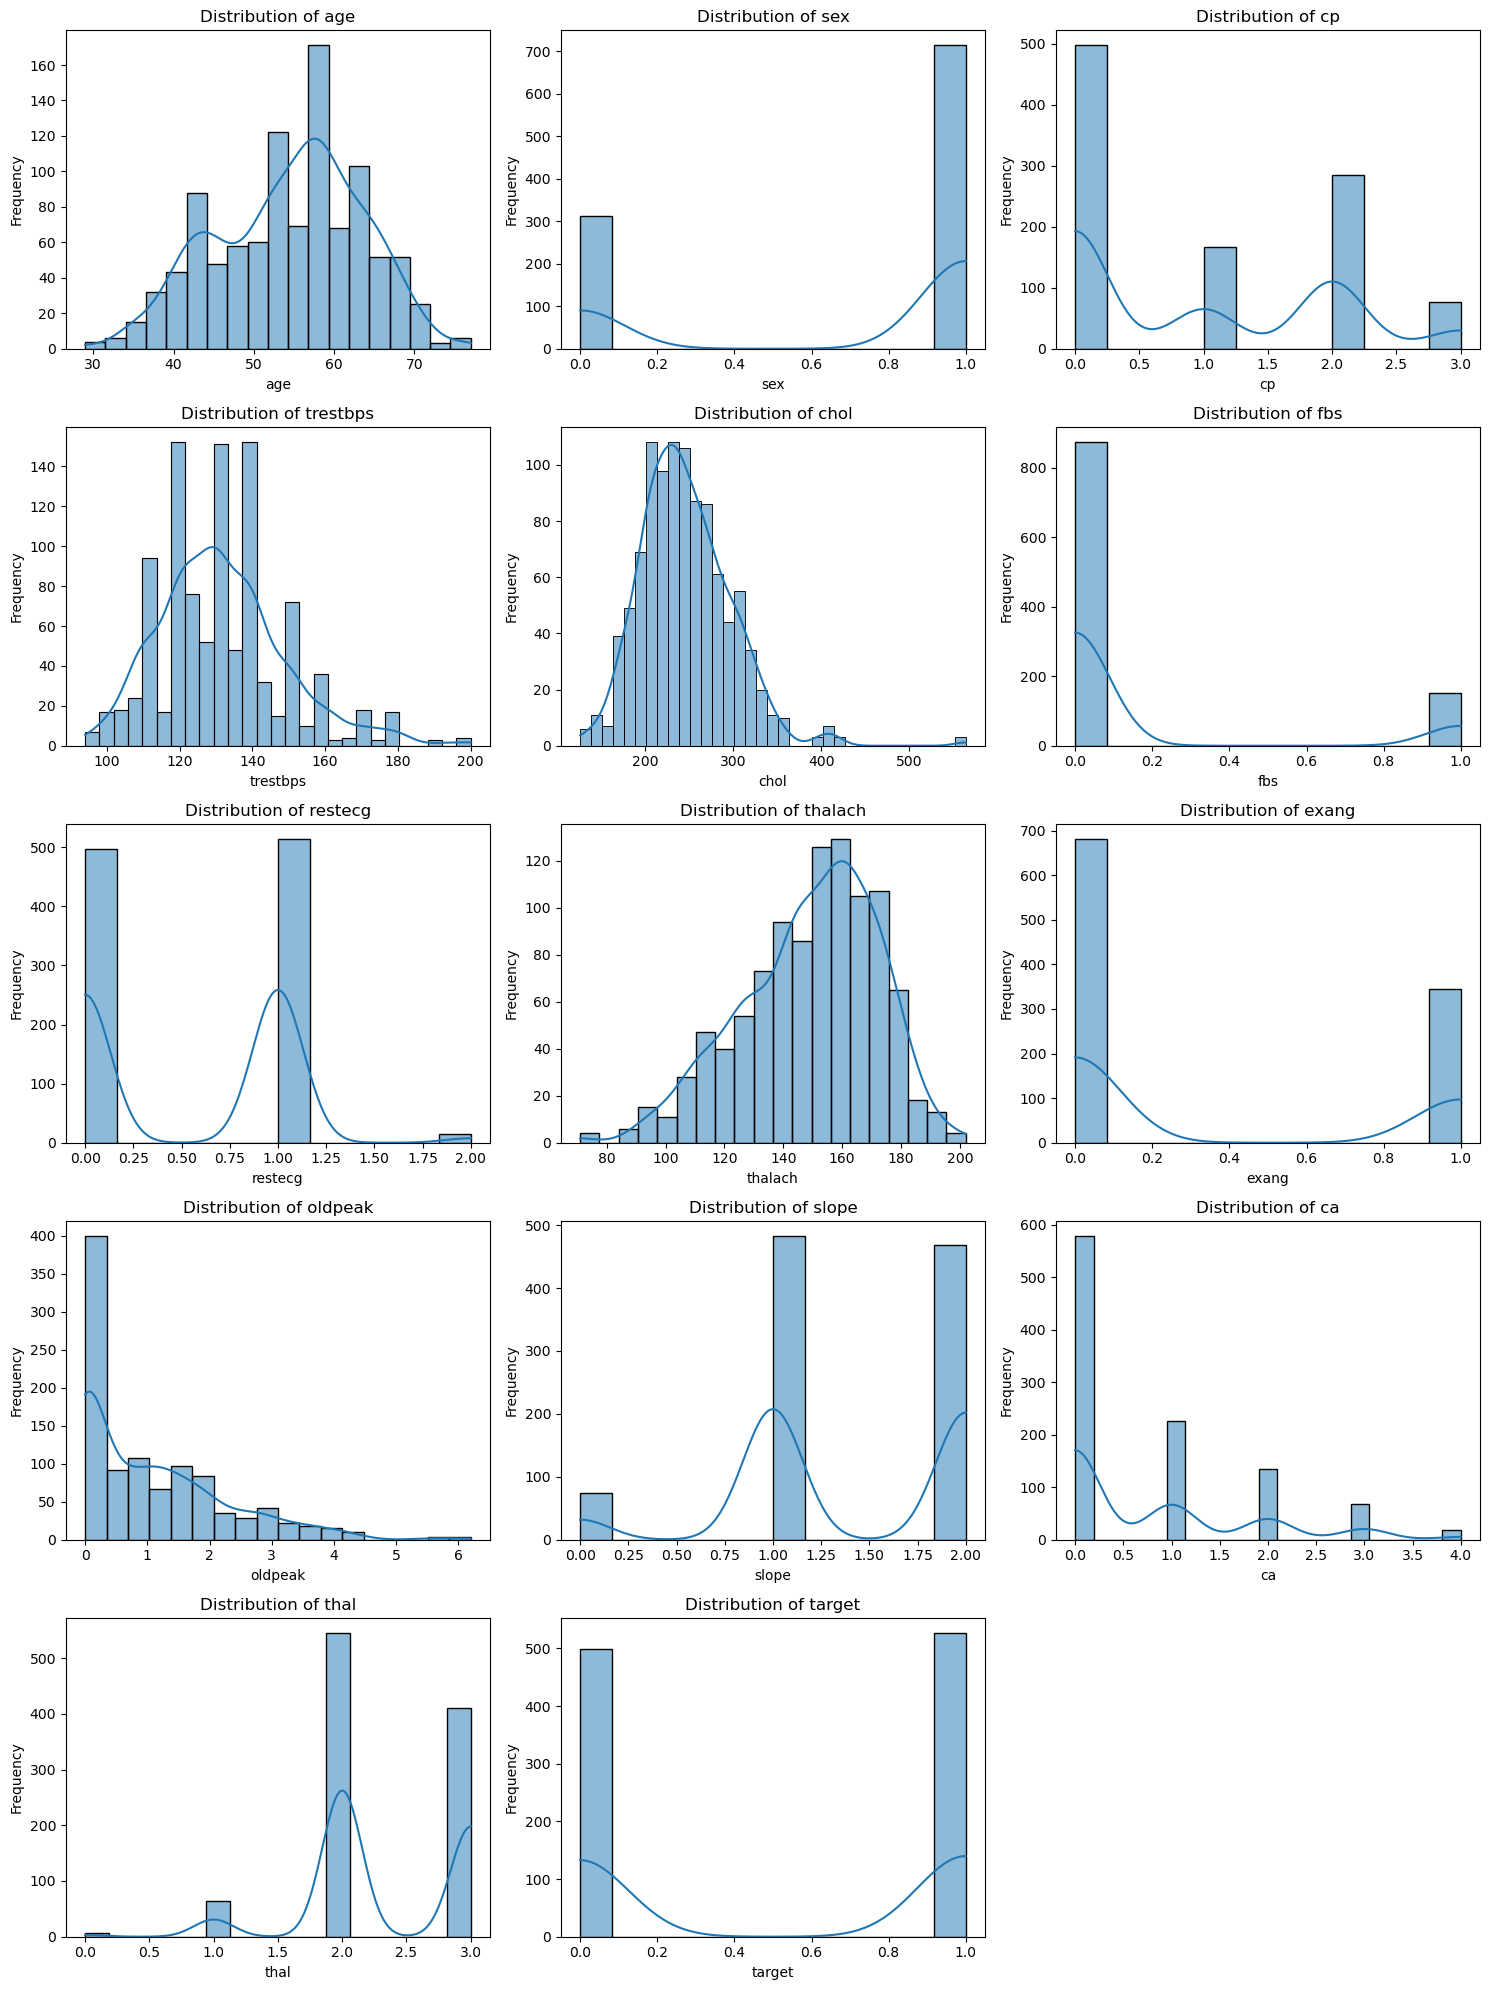

In [30]:
# Select only the numerical features
numerical_features = heart_data.select_dtypes(include=['float64', 'int64']).columns

# Set up the matplotlib figure
plt.figure(figsize=(15, 20))

# Create a distribution plot for each numerical feature
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)
    sns.histplot(heart_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64



# Splitting data into training data & test data

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


# Model Training
* Logistic regression

In [58]:
model = LogisticRegression()

In [60]:
model.fit(X_train, Y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
Y_pred = model.predict(X_test)

In [74]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.80
Precision: 0.77
Recall: 0.89
F1 Score: 0.82


In [76]:
#To be more precise 
accuracy = accuracy_score(Y_test, Y_pred)*100
precision = precision_score(Y_test, Y_pred)*100
recall = recall_score(Y_test, Y_pred)*100
f1 = f1_score(Y_test, Y_pred)*100


print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'F1 Score: {f1:.2f}%')

Accuracy: 80.49%
Precision: 76.86%
Recall: 88.57%
F1 Score: 82.30%


In [67]:
print("Classification Report")
print(classification_report(Y_test, Y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [68]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Confusion Matrix:
[[72 28]
 [12 93]]


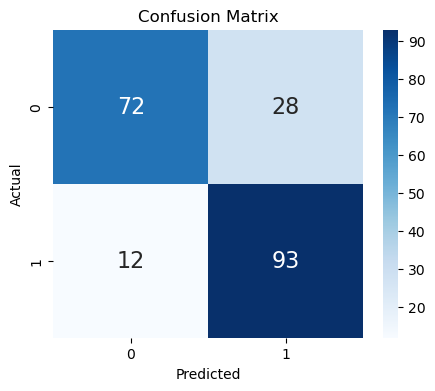

In [70]:
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# Model Evaluation
* Accuracy Score


In [63]:
#accuracy on training data 
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [64]:
print('Accuracy on training data :', training_data_accuracy)

Accuracy on training data : 0.8524390243902439


In [52]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [26]:
print('Accuracy on test data :', test_data_accuracy)

Accuracy on test data : 0.8048780487804879


# Building predictive system

In [27]:
input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)

# change input_data into numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for one instance/datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
    print('The person does not have heart disease')
else:
    print('The person has heart disease')

[1]
The person has heart disease


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
